# ORIE 4580/5580/5581 Assignment 4

#### Student: A. Elison (ahe45)

### Github link: https://github.com/Abbie000/ORIE-4580-HWs/blob/main/ORIE_4580_HW_4.ipynb


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

Since trains arrive at the station deterministically every 10 minutes, trains arrive at times: $0, 10, 20, ..., 1000$ min.

For a randomly chosen passenger $i$ arriving at time $T_i$, their next train is at:
$$TimeNextTrain(T_i) = 10 \cdot ⌈\frac{T_i}{10}⌉$$
So the wait time for passenger $i$ is:
$$W_i = TimeNextTrain(T_i) - T_i$$

In [4]:
import numpy as np
from scipy import stats

np.random.seed(42)

# Step 1: Generate a stream of 10,000 train passengers and their arrival times
n = 10000
# Each passenger has an independent arrival time which is uniformly distributed over an interval of 1,000 min
arrival_times = np.random.uniform(0, 1000, n)   # where passenger i arrives at time T_i ~ [0, 1000]
# Sort the passengers by arrival time
arrival_times = arrival_times[np.argsort(arrival_times)]

# Step 2: Compute wait times until next train
next_train_times = 10* np.ceil(arrival_times / 10)
wait_times = next_train_times - arrival_times

# Step 3: Compute average wait time and confidence interval
mean_wait = np.mean(wait_times)
std_dev = np.std(wait_times, ddof=1)

# 95% confidence interval
conf_int = stats.t.interval(0.95, df=n-1, loc=mean_wait, scale=std_dev/np.sqrt(n))

print(f"Expected wait time of any randomly chosen passenger: {mean_wait:.2f} minutes")
print(f"95% Confidence Interval: [{conf_int[0]:.2f}, {conf_int[1]:.2f}] minutes")

Expected wait time of any randomly chosen passenger: 5.02 minutes
95% Confidence Interval: [4.96, 5.07] minutes


Since the passenger arrival times are uniform and trains come every $10$ minutes, the waiting time is uniformly distributed over $[0, 10]$ minutes.
So, using the equation for the expectation of a uniform random variable, the expected wait time is:
$$𝔼[W] = \frac{0+10}{2} = 5 \, minutes$$

Thus, as expected, the simulated value of $5.02$ minutes above is very close to the analytical solution of $5$, and the corresponding simulated confidence interval of $[4.96, 5.07]$ minutes is tight around $5$.

<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

From the sorted vector of passenger arrival times above, we have:

$10,000$ passenger arrival times: $T_i \sim Uniform(0,1000)$, sorted

Now, train arrival times are random with inter-arrival times between trains being sampled from an exponential distribution with mean $10$ minutes.

So, if $A_j$ is the arrival time of train $j$, then:
$$A_{j+1} = A_j + X_j \quad , \quad X_j \sim Exponential(λ = \frac{1}{10})$$

So the wait time for passenger $i$ is:
$$W_i = A_j - T_i$$

In [ ]:
np.random.seed(42)

# Step 1: Generate passenger arrival times
n_passengers = 10000
passenger_times = arrival_times   # Using the vector of passenger arrival times from part (1a)

# Step 2: Generate train arrivals using exponential inter-arrival times
train_times = []
current_time = 0
while current_time < 1000:
    inter_arrival = np.random.exponential(scale=10)  # mean = 10
    current_time += inter_arrival
    train_times.append(current_time)
train_times = np.array(train_times)

# Step 3: For each passenger, find next train and compute wait time
wait_times = np.empty(n_passengers)
train_idx = 0

for i, t in enumerate(passenger_times):
    # Binary search for next train
    while train_idx < len(train_times) and train_times[train_idx] < t:
        train_idx += 1
    wait_times[i] = train_times[train_idx] - t if train_idx < len(train_times) else 0

# Step 4: Compute expected wait time and 95% CI
mean_wait = np.mean(wait_times)
std_dev = np.std(wait_times, ddof=1)
CI = stats.t.interval(0.95, df=n_passengers-1, loc=mean_wait, scale=std_dev/np.sqrt(n_passengers))

print(f"Expected wait time of any randomly chosen passenger: {mean_wait:.2f} minutes")
print(f"95% Confidence Interval: [{CI[0]:.2f}, {CI[1]:.2f}] minutes")

Expected wait time of any randomly chosen passenger: 9.14 minutes
95% Confidence Interval: [8.98, 9.30] minutes


Since the trains arrive according to an exponential distribution, the expected wait time can be calculated analytically:
$$𝔼[W] = \frac{1}{λ} = \frac{1}{\frac{1}{10}} = 10 \, minutes$$

As expected, the simulated wait time of any randomly chosen passenger is $9.14 \approx 10$ minutes and the 95% confidence interval of $[8.98,9.30]$ minutes is somewhat close to $10$.

<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [17]:
# train_times = [I_1, I_2, ..., I_N]  # sorted ASC
inter_arrivals = np.diff(train_times) # train_times as generated from part (b)
n_trains = len(inter_arrivals)

mean_inter_arrival = np.mean(inter_arrivals)
std_dev = np.std(inter_arrivals, ddof=1)

# 95% Confidence Interval
CI = stats.t.interval(0.95, df=n_trains - 1, loc=mean_inter_arrival, scale=std_dev / np.sqrt(n_trains))

print(f"Empirical mean inter-arrival time between trains: {mean_inter_arrival:.2f} minutes")
print(f"95% Confidence Interval: [{CI[0]:.2f}, {CI[1]:.2f}] minutes")

Empirical mean inter-arrival time between trains: 9.04 minutes
95% Confidence Interval: [7.33, 10.75] minutes


As the inter-arrival times are exponentially distributed with an analytical mean of $10$ minutes as calculated in part (b), the empirical mean of $9.04 \approx 10$ minutes and the confidence interval of $[7.33, 10.75]$ contains $10$ as expected.

<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, then we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

As given,
$$I_i = A_n - A_{n-1}$$

Since each train arrival time $A_i$ is sampled from an exponential distribution rather than a uniform distribution, inter-arrival times $I_i$ are also exponential rather than uniform. Since the trains are assumed to have infinite capacity where everyone on the platform at the time of a train's arrival boards that train instantaneously, inter-arrival times $I_i$ are weighted by the number of passengers that uniformly arrive during the interval $(A_{n-1}, A_n]$.

Consequently, you're more likely to experience longer intervals compared to the case of uniform train arrival times because longer intervals have more passengers.

In [24]:
# train_times and passenger_times are already defined

# Step 1: For each passenger, find the index of the train they board
passenger_train_idx = np.searchsorted(train_times, passenger_times, side='left')

# Step 2: For each passenger, compute the inter-arrival time of that train: I_i = A_n - A_{n-1}
I_i = []

for idx in passenger_train_idx:
    if idx == 0:
        continue  # skip first train (no A_{n-1})
    inter_arrival = train_times[idx] - train_times[idx - 1]
    I_i.append(inter_arrival)

I_i = np.array(I_i)

# Step 3: Compute sample mean and 95% CI
mean_I = np.mean(I_i)
std_I = np.std(I_i, ddof=1)
n = len(I_i)
CI = stats.t.interval(0.95, df=n-1, loc=mean_I, scale=std_I/np.sqrt(n))

print(f"Mean inter-arrival time between trains that each passenger experiences (where train arrival times are exponentially distributed): {mean_I:.2f} min")
print(f"95% CI: [{CI[0]:.2f}, {CI[1]:.2f}] min")


Mean inter-arrival time between trains that each passenger experiences (where train arrival times are exponentially distributed): 18.12 min
95% CI: [17.90, 18.33] min


For the inter-arrival times, the sample mean of $18.12$ min is roughly twice as much as the expected wait time of any randomly chosen passenger as computed in part b ($9.14$ min) and roughly four times as much as the the expected wait time of any randomly chosen passenger as computed in part a ($5.02$ min).

This relation with part b occurs because with train arrival times being exponentially distributed while passenger arrival times are uniformly distributed, passengers are more likely to fall into larger gaps, which correspond to a larger inter-arrival time between two trains $I_i$. Since each passenger $i$ arrives uniformly in the time interval $(A_{n-1}, A_n]$ which has a mean of $18.12$ min as computed in part d, the expected wait time for passenger $i$ is
$$𝔼[W] = \frac{0+18.12}{2} = 9.06 ≈ 9.14 \, minutes$$
as expected.

As for part a, the arrival time between two trains are deterministically every $10$ minutes whereas for parts b-d, arrival times are randomly sampled from an exponential distribution with a computed mean inter-arrival time of $18.12$ minutes, almost twice as long as the deterministic case. So the expected wait time compared to part a is roughly twice as long as expected.

**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

See the explanation in part d above.


<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

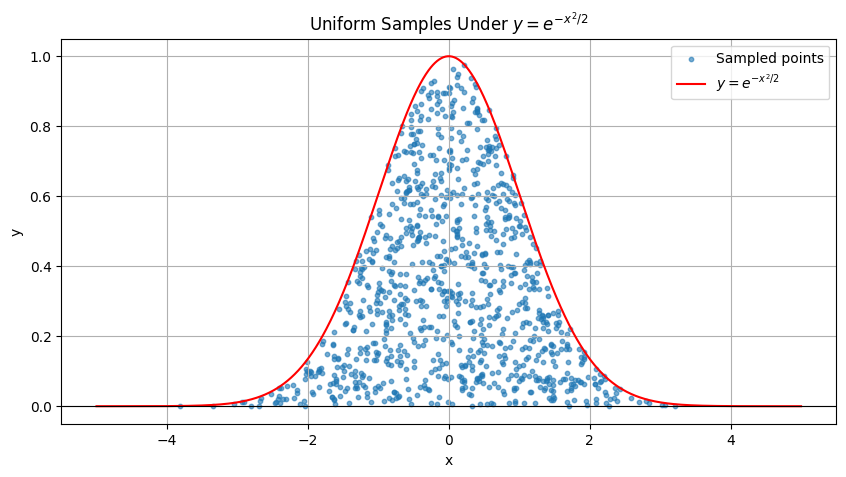

In [5]:
import matplotlib.pyplot as plt

np.random.seed(42)

# Parameters
n_samples = 1000
samples = []
L = 5  # cutoff for x

while len(samples) < n_samples:
    x = np.random.uniform(-L, L)
    y = np.random.uniform(0, 1)
    f_x = np.exp(-x**2 / 2)
    if y <= f_x:
        samples.append((x, y))

# Convert to numpy array for plotting
samples = np.array(samples)
x_vals = samples[:, 0]
y_vals = samples[:, 1]

# Plotting
x_plot = np.linspace(-L, L, 1000)
y_curve = np.exp(-x_plot**2 / 2)

plt.figure(figsize=(10, 5))
plt.scatter(x_vals, y_vals, s=10, alpha=0.6, label='Sampled points')
plt.plot(x_plot, y_curve, color='red', label=r'$y = e^{-x^2/2}$')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniform Samples Under $y = e^{-x^2/2}$')
plt.legend()
plt.grid(True)
plt.show()

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

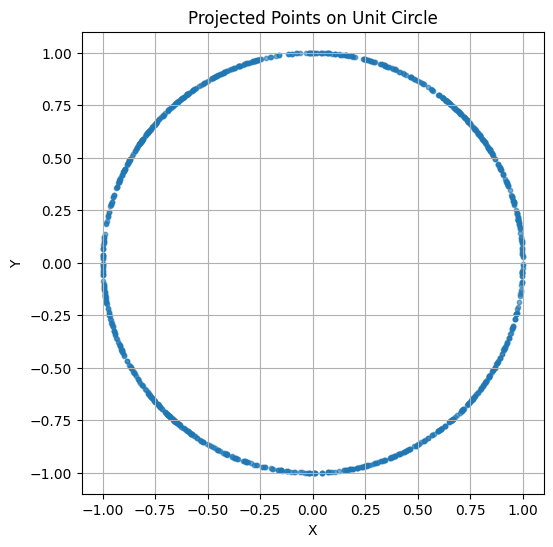

In [37]:
np.random.seed(42)

# Step 1: Generate 1000 points (U_i, V_i) uniformly in [-1, 1]^2
n = 1000
U = np.random.uniform(-1, 1, n)
V = np.random.uniform(-1, 1, n)

# Step 2: Project these 1000 points onto the unit circle
norms = np.sqrt(U**2 + V**2)
X = U / norms
Y = V / norms

# Step 3: Compute angles θ_i for the histogram
angles = np.arctan2(Y, X)  # Gives values in [-π, π]

# Step 4: Plot the points on a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(X, Y, s=10, alpha=0.6)
plt.gca().set_aspect('equal')
plt.title('Projected Points on Unit Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

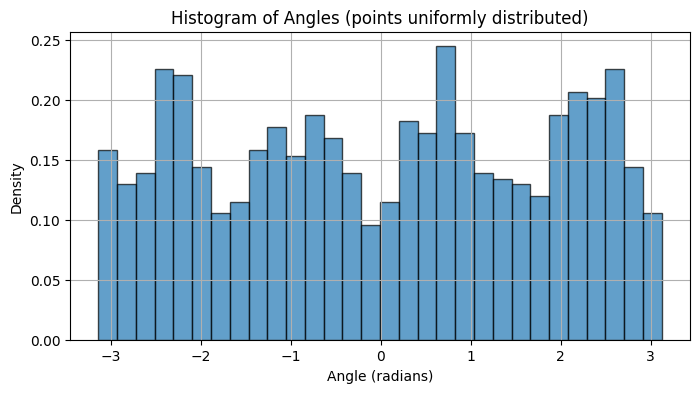

In [48]:
# Step 5: Histogram of angles
plt.figure(figsize=(8, 4))
plt.hist(angles, bins=30, density=True, edgecolor='k', alpha=0.7)
plt.title('Histogram of Angles (points uniformly distributed)')
plt.xlabel('Angle (radians)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Every angle on the above histogram does not have the same density. Hence, the 1000 generated points are not uniformly distributed on the circumference of the circle.

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

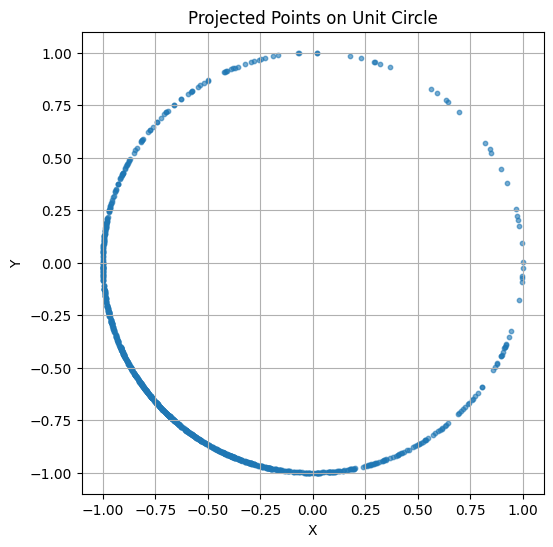

In [45]:
np.random.seed(42)

# Step 1: Generate 1000 points (U_i, V_i) normally distributed in [-1, 1]^2
n = 1000
U_c = np.random.normal(-1, 1, n)
V_c = np.random.normal(-1, 1, n)

# Step 2: Project these 1000 points onto the unit circle
norms_c = np.sqrt(U_c**2 + V_c**2)
X_c = U_c / norms_c
Y_c = V_c / norms_c

# Step 3: Compute angles θ_i for the histogram
angles_c = np.arctan2(Y_c, X_c)  # Gives values in [-π, π]

# Step 4: Plot the points on a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(X_c, Y_c, s=10, alpha=0.6)
plt.gca().set_aspect('equal')
plt.title('Projected Points on Unit Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

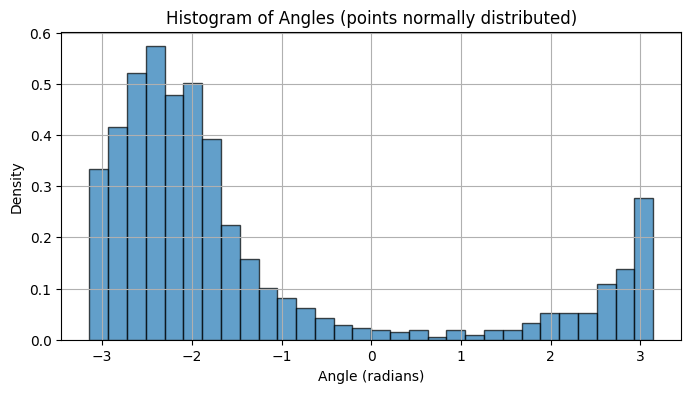

In [49]:
# Step 5: Histogram of angles
plt.figure(figsize=(8, 4))
plt.hist(angles_c, bins=30, density=True, edgecolor='k', alpha=0.7)
plt.title('Histogram of Angles (points normally distributed)')
plt.xlabel('Angle (radians)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Again, every angle on the above histogram does not have the same density. So the 1000 generated points are not uniformly distributed on the circumference of the circle. However, the density of angles does roughly follow a standard normal distribution with its center around 0 radians as expected.

Compared to part c, part b has a distribution of points that are closer to uniform, which makes sense given the points are sampled from a uniform distribution. However, since both sets of 1000 points in parts b and c are randomly drawn and not that large (only 1000), the distribution of points is not exactly uniform in case b or exactly normal (or exactly uniform) in case c.

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.

Let the returns $R_i$ be

$$\boldsymbol{R}=
\begin{bmatrix}
    R_1 \\
    R_2 \\
    R_3\\
\end{bmatrix} \sim 𝒩(\mu_i, σ_i^2)$$


Since all three instruments are independent of each other,

$ℙ[R_1 > 0, R_2 > 0, R_3 > 0] = ℙ[R_1 > 0] ⋅ ℙ[R_2 > 0] ⋅ ℙ[R_3 > 0]$

$ \qquad\qquad\qquad\qquad\qquad\,\, = 𝚽(\frac{0.14}{(0.0625)^{1/2}}) ⋅ 𝚽(\frac{0.07}{(0.01)^{1/2}}) ⋅ 𝚽(\frac{0.16}{(0.09)^{1/2}})$

$ \qquad\qquad\qquad\qquad\qquad\,\, = 𝚽(0.56) ⋅ 𝚽(0.7) ⋅ 𝚽(0.53)$

$ℙ[R_1 > 0, R_2 > 0, R_3 > 0] \approx 0.3790$

The intermediary steps between the last and second to last line are shown and computed in the following code block:

In [60]:
from scipy.stats import norm

p1 = norm.cdf(0.56)     # ≈ 0.7123
p2 = norm.cdf(0.7)      # ≈ 0.7580
p3 = norm.cdf(0.53)     # ≈ 0.7019

prob_all_three_positive = p1 * p2 * p3
print(f"Probability all three financial products simultaneously yield a positive return: {prob_all_three_positive:.4f}")

Probability all three financial products simultaneously yield a positive return: 0.3790


<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [17]:
from scipy.linalg import cholesky

np.random.seed(42)

# Mean vector and covariance matrix
mu = np.array([0.14, 0.07, 0.16])
sigma = np.array([[0.0625, -0.01, 0.0375],
                  [-0.01, 0.01, -0.015],
                  [0.0375, -0.015, 0.09]])

# Cholesky decomposition (lower triangular)
L = cholesky(sigma, lower=True)

# Simulation parameters
n_sim = 100_000
count_positive = 0

# Simulate n_sim samples
for _ in range(n_sim):
    z = np.random.normal(0, 1, 3)        # generates iid standard normal random variables
    r = mu + L @ z                       # transform to correlated normal
    if np.all(r > 0):                    # check if all returns > 0
        count_positive += 1

# Step 5: estimate probability
prob = count_positive / n_sim
print(f"Estimated probability all returns > 0: {prob:.4f}")

Estimated probability all returns > 0: 0.3713


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.

For a uniform distribution,

$𝔼[X] = \frac{(α+β)}{2} = 0 \implies α = - β$

$Var[X] = \frac{(β - α)^2}{12} = 1 \implies \frac{(β - (-β))^2}{12} = \frac{(2β)^2}{12} = \frac{4β^2}{12} = \frac{β^2}{3} = 1 \implies β = \sqrt[]3$

So $α = - β = - \sqrt[]3$.

Hence, the closed interval $[α, β] = [- \sqrt[]3, \sqrt[]3]$ where $V \sim Uniform[- \sqrt[]3, \sqrt[]3]$.

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.

Total expectation:

$𝔼[V_2] = 𝔼[V_2 | B = 0] ⋅ ℙ[B = 0] + 𝔼[V_2 | B = 1] ⋅ ℙ[B =1]$

$\qquad\,\, = 𝔼[X_1] ⋅ (1-p) + 𝔼[X_2] ⋅ p$

$\qquad\,\, = 0 ⋅ (1-p) + 0 ⋅ p$

$𝔼[V_2] = 0$


Total Variance:

$Var[V_2] = Var[V_2 | B = 0] ⋅ ℙ[B = 0] + Var[V_2 | B = 1] ⋅ ℙ[B =1]$

$\qquad\quad\,\, = Var[V_2 | B = 0] ⋅ (1-p) + Var[V_2 | B = 1] ⋅ p$

$\qquad\quad\,\, = Var[X_1] ⋅ (1-p) + Var[X_2] ⋅ p$

$\qquad\quad\,\, = 1 ⋅ (1-p) + 1 ⋅ p$

$Var[V_2] = 1$

<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.

$Cov(V_1, V_2) = 𝔼[V_1V_2] - 𝔼[V_1] \, 𝔼[V_2]$

$\qquad\quad\quad\,\,\, = 𝔼[V_1V_2] - 0$

$\qquad\quad\quad\,\,\, = 𝔼[X_1 ⋅ ((1-B)X_1 + BX_2)]$

$\qquad\quad\quad\,\,\, = 𝔼[(1-B)X_1^2 + BX_1X_2]$

Due to independence,

$\qquad\quad\quad\,\,\, = 𝔼[1-B] ⋅ 𝔼[X_1^2] + 𝔼[B] ⋅ 𝔼[X_1X_2]$

Note:

- Since $𝔼[X_1] = 0$, $𝔼[X_1^2] = 1$.

- Because of independence, $𝔼[X_1X_2] = 𝔼[X_1] 𝔼[X_2] = 0$

$\qquad\quad\quad\,\,\, = (1-p) ⋅ 1 + p ⋅ 0$

So

$Cov(V_1, V_2) = 1 - p$

It follows that

$Cov(V_1, V_2) = σ_{12} = 1 - p \implies p = 1 - σ_{12}\,$ where $\,σ_{12} \in [0,1]$

<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

In [1]:
def generate_two_correlated_uniform_rvs(n_samples, sigma12):
    """
    Generate two correlated uniform variables V1, V2 with:
    - E[V1] = E[V2] = 0
    - Var(V1) = Var(V2) = 1
    - Cov(V1, V2) = sigma12
    """
    assert 0 <= sigma12 <= 1, "sigma12 must be in [0, 1]"

    np.random.seed(42)

    p = 1 - sigma12
    alpha, beta = -np.sqrt(3), np.sqrt(3)

    # Generate X1, X2 ~ Uniform[-sqrt(3), sqrt(3)]
    X1 = np.random.uniform(alpha, beta, n_samples)
    X2 = np.random.uniform(alpha, beta, n_samples)

    # Generate B ~ Bernoulli(p)
    B = np.random.binomial(1, p, n_samples)

    V1 = X1
    V2 = (1 - B) * X1 + B * X2

    return V1, V2

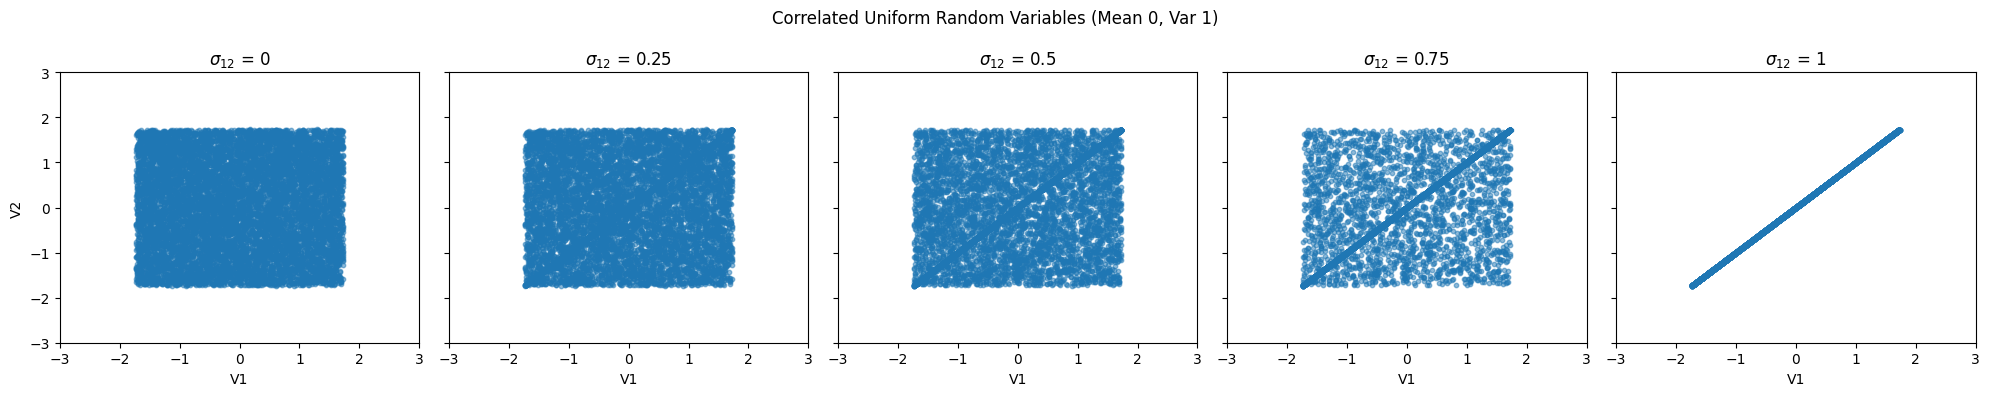

In [7]:
# Scatter plots for different sigma12 values
sigma_vals = [0, 0.25, 0.5, 0.75, 1]
num_samples = 10000

fig, axes = plt.subplots(1, len(sigma_vals), figsize=(20, 4), sharey=True)

for i, sigma in enumerate(sigma_vals):
    V1, V2 = generate_two_correlated_uniform_rvs(num_samples, sigma)
    axes[i].scatter(V1, V2, alpha=0.5, s=10)
    axes[i].set_title(f"$\\sigma_{{12}}$ = {sigma}")
    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(-3, 3)
    axes[i].set_xlabel("V1")
    if i == 0:
        axes[i].set_ylabel("V2")

plt.suptitle("Correlated Uniform Random Variables (Mean 0, Var 1)")
plt.tight_layout()
plt.show()

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [12]:
def estimate_joint_default_probability(n_samples, sigma12):
    V1, V2 = generate_two_correlated_uniform_rvs(n_samples, sigma12)
    joint_default = np.logical_and(V1 <= 0, V2 <= 0)
    prob = np.mean(joint_default)
    return prob

In [29]:
prob_default = estimate_joint_default_probability(n_samples=10000, sigma12=0.5)
print(f"P[V1 ≤ 0, V2 ≤ 0] for σ₁₂ = 0.5 is approximately: {prob_default:.4f}")

P[V1 ≤ 0, V2 ≤ 0] for σ₁₂ = 0.5 is approximately: 0.3820


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.


In [23]:
from scipy.stats import norm

In [24]:
def generate_copula_uniforms(num_samples, sigma12, alpha, beta):

    np.random.seed(42)

    # Step 1: Create a covariance matrix
    Sigma = np.array([[1, sigma12], [sigma12, 1]])

    # Step 2: Perform Cholesky decomposition
    L = cholesky(Sigma, lower=True)

    # Step 3: Generate independent normal random variables and correlate them
    Z = np.random.randn(2, n_samples)  # shape (2, n_samples)
    correlated_Z = L @ Z  # shape (2, n_samples)

    # Step 4: Apply standard normal CDF to get uniform random variables
    U = norm.cdf(correlated_Z)

    # Step 5: Transform uniform random variables to [alpha, beta]
    W = alpha + (beta - alpha) * U
    W1, W2 = W[0], W[1]

    return W1, W2

Since $Z_1$ and $Z_2$ are transformed to uniform random variables via the Gaussian copula trick. In other terms, $𝚽(Z_i) \sim Uniform[0,1]$ for $i = 1,2$.

Since $α + (β - α) Φ(Z_i)$ scales $Z_i$ to the interval [α, β], $W_1, W_2$ are uniform on [α, β].

P[W1 ≥ 0, W2 ≥ 0] for σ₁₂ = 0.5 is approximately: 0.3370


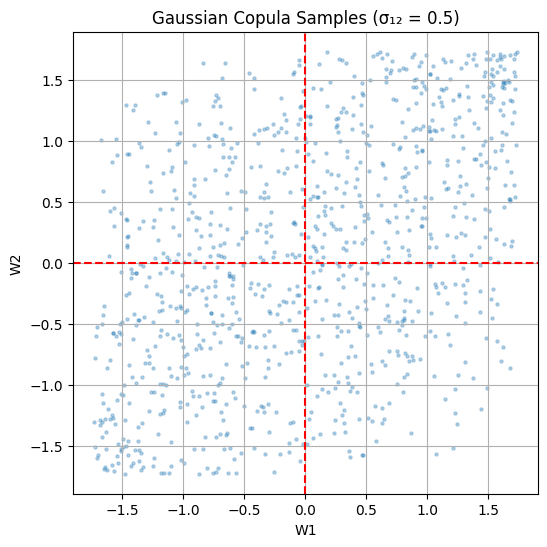

In [27]:
# Generate samples
W1, W2 = generate_copula_uniforms(num_samples=10000, sigma12=0.5, alpha=-np.sqrt(3), beta=np.sqrt(3))

print(f"P[W1 ≥ 0, W2 ≥ 0] for σ₁₂ = 0.5 is approximately: {prob:.4f}")

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(W1, W2, alpha=0.3, s=5)
plt.axvline(0, color='red', linestyle='--')
plt.axhline(0, color='red', linestyle='--')
plt.title("Gaussian Copula Samples (σ₁₂ = 0.5)")
plt.xlabel("W1")
plt.ylabel("W2")
plt.grid(True)
plt.axis('equal')
plt.show()

# Compute empirical probability: P[W1 ≥ 0, W2 ≥ 0]
joint_positive = np.logical_and(W1 >= 0, W2 >= 0)
prob = np.mean(joint_positive)